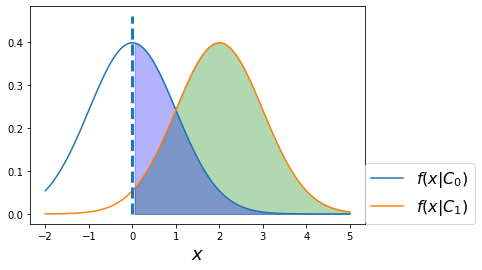

interactive(children=(FloatSlider(value=0.0, description='c', max=5.0, min=-3.0, step=0.05), Output()), _dom_c…

<function __main__.plot_roc_interact(c=0)>

In [12]:
# Import Libraries
%matplotlib inline
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Plot
f0 = stats.norm(0, 1)
f1 = stats.norm(2, 1)
fig, ax = plt.subplots()
xi = np.linspace(-2, 5, 100)
ax.plot(xi, f0.pdf(xi), label=r'$f(x|C_0)$')
ax.plot(xi, f1.pdf(xi), label=r'$f(x|C_1)$')
ax.legend(fontsize=16, loc=(1, 0))
ax.set_xlabel(r'$x$', fontsize=18)
ax.vlines(0, 0, ax.axis()[-1] * 1.1, linestyles='--', lw=3.)
ax.fill_between(xi, f1.pdf(xi), where=xi > 0, alpha=.3, color='g')
ax.fill_between(xi, f0.pdf(xi), where=xi > 0, alpha=.3, color='b')

# Plot ROC-curve and make all interactive
def plot_roc_interact(c=0):
    xi = np.linspace(-3,5,100)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches((10,3))
    ax = axs[0]
    ax.plot(xi,f0.pdf(xi),label=r'$f(x|C_0)$')
    ax.plot(xi,f1.pdf(xi),label=r'$f(x|C_1)$')
    ax.set_xlabel(r'$x$',fontsize=18)
    ax.vlines(c,0,ax.axis()[-1]*1.1,linestyles='--',lw=3.)
    ax.fill_between(xi,f1.pdf(xi),where=xi>c,alpha=.3,color='g')
    ax.fill_between(xi,f0.pdf(xi),where=xi>c,alpha=.3,color='b')
    ax.axis(xmin=-3,xmax=5)
    crange = np.linspace(-3,5,50)
    ax=axs[1]
    ax.plot(1-f0.cdf(crange),1-f1.cdf(crange))
    ax.plot(1-f0.cdf(c),1-f1.cdf(c),'o',ms=15.)
    ax.set_xlabel('False-alarm probability')
    ax.set_ylabel('Detection probability')
    
interact(plot_roc_interact,c=(-3,5,.05))



In [18]:
print('p-value:',stats.wilcoxon(f1.rvs(30), f0.rvs(30))[1])

p-value: 1.9729484515803686e-05
